<center>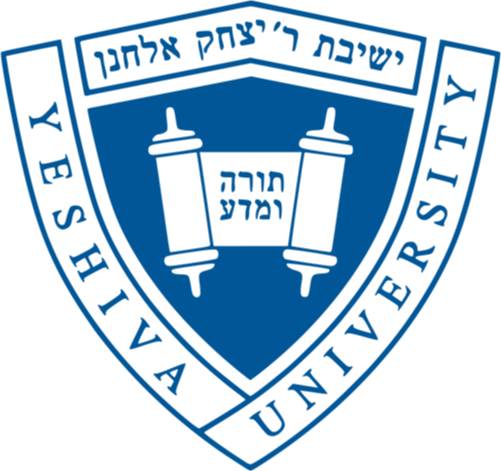</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5005 Machine Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 08</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

## 1. Implement GMM method using EM algorithm (70 points)
### should return $\pi_k$, $\mu_k$, $\Sigma_k$

In [155]:
# Load packages
import numpy as np
import pandas as pd
from scipy.io import loadmat
import scipy
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [156]:
class GaussianMixtureModel:
    def __init__(self, k = 3, max_iterations = 100, tol = 1e-3):
        self.k = k
        self.max_iterations = max_iterations
        self.tol = tol
        self.mu = None
        self.sigma = None
        self.pi = None


    
    def fit(self, X):
        # Initialize the parameters and implement E and M steps

        N, D = X.shape
        log_like_history = []

        # Initialization parameters
        np.random.seed(2023)
        self.mu = np.random.randn(self.k, D)
        self.sigma = [np.eye(D) for k in range(self.k)]
        self.pi = np.ones(self.k) / self.k

        for i in range(self.max_iterations):
            ########### E-step ###########
            responsibilities =  np.zeros((N, self.k))

            for i in range(self.k):
                responsibilities[:, i] = self.pi[i] * multivariate_normal.pdf(X, mean = self.mu[i], cov = self.sigma[i])
            responsibilities = responsibilities / responsibilities.sum(axis = 1, keepdims = True)

            ########### M-step ###########
            Nk = responsibilities.sum(axis = 0)
            self.pi = Nk / N
            self.mu = (responsibilities.T @ X) / Nk[:, None]

            for i in range(self.k):
                diff = X - self.mu[i]
                self.sigma[i] = ((responsibilities[:, i, None] * diff).T @ diff) / Nk[i]

            # Compute the log-likelihood
            Nu = np.zeros((N, self.k))
            for i in range(self.k):
                Nu[:, i] = self.pi[i] * multivariate_normal.pdf(X, mean = self.mu[i], cov = self.sigma[i])  
            log_like = np.sum(np.log(np.sum(Nu, axis = 1)))

            # Check for convergence
            if len(log_like_history) > 0 and log_like - log_like_history[-1] < self.tol:
                log_like_history.append(log_like)
                break

            log_like_history.append(log_like)

        return self.pi, self.mu, self.sigma
    
    
    def predict(self, X):
        # Find the cluster probabilities

        probabilities = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
           probabilities[:, i] = self.pi[i] * multivariate_normal.pdf(X, mean = self.mu[i], cov = self.sigma[i])

        return np.argmax(probabilities, axis = 1) # Return the labels

## 2. Load X.mat, and estimate parameters: $\pi_k$, $\mu_k$, $\Sigma_k$ (10 points)

#### __Loading data__

In [157]:
data = loadmat("./data/x.mat")
X = data['X']
print(f"X.shape = {X.shape}")

X.shape = (1800, 2)


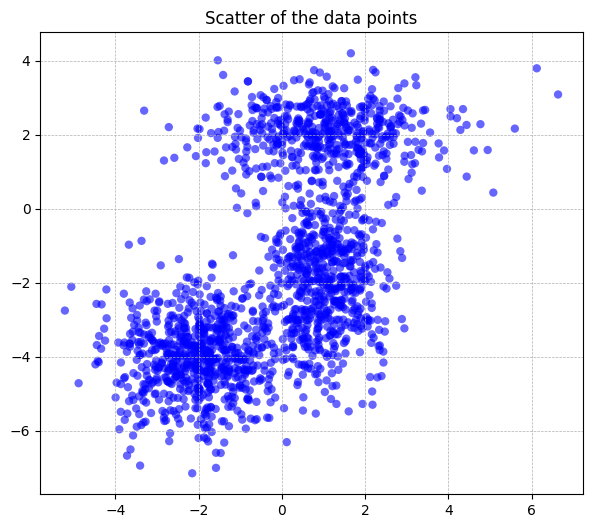

In [158]:
# figure size
plt.figure(figsize = (7, 6))
plt.scatter(X[:, 0], X[:, 1], c = 'b', alpha = 0.6, edgecolors ='none')
plt.title('Scatter of the data points')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [159]:
# Create an object of class "GaussianMixtureModel"
my_gmm = GaussianMixtureModel()

# Estimate parameters with calling method fit()
pi, mu, sigma = my_gmm.fit(X)

print(f"pi = \n{pi}\n")
print(f"mu = \n{mu}\n")

print(f"sigma = ")
for s in sigma:
    print(f"{s}\n")

pi = 
[0.33520723 0.27435346 0.39043931]

mu = 
[[ 1.0414244  -1.95367685]
 [ 1.04934305  2.06650709]
 [-1.9990951  -4.0139978 ]]

sigma = 
[[0.51174257 0.00403795]
 [0.00403795 1.84411742]]

[[2.09849726 0.01473367]
 [0.01473367 0.49362748]]

[[1.02476967 0.00455785]
 [0.00455785 0.98787125]]



## 3. Determine the labels of each data using probability of each data: $P(x)$ (10 points)
### $[\pi_1 \mathcal{N}(x_i|\mu_1, \Sigma_1), \pi_2 \mathcal{N}(x_i|\mu_2, \Sigma_2), \pi_3 \mathcal{N}(x_i|\mu_3, \Sigma_3)]$

In [160]:
pred_y = my_gmm.predict(X)[:, None]

In [161]:
df = pd.DataFrame(np.concatenate((X, pred_y), axis = 1), columns = ['x1','x2','label'])
df.label = df.label.astype(int)
df

,x1,x2,label
0,1.956278,2.094859,1
1,0.924220,2.538238,1
2,2.831249,2.346145,1
3,-1.543931,2.746824,1
4,1.859962,1.479576,1
...,...,...,...
1795,2.106026,-2.335066,0
1796,1.901406,-3.169427,0
1797,1.662917,-2.194019,0
1798,0.461823,-0.695171,0


## 4. Plot the results of three clusters (10 points)

In [162]:
# Define colors for each label
colors = {0: 'red', 1: 'green', 2: 'blue'}

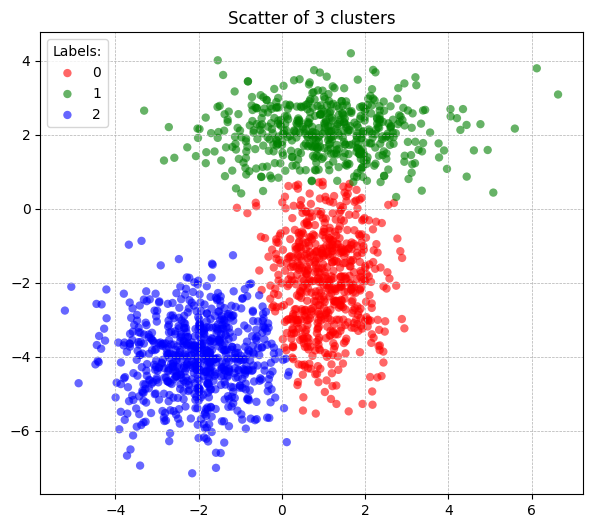

In [163]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (7, 6))
for label, color in colors.items():
    subset = df[df.label == label]
    ax.scatter(subset.x1, subset.x2, c = color, label = label, alpha = 0.6, edgecolors ='none')
ax.legend(title = "Labels:")
ax.set_title('Scatter of 3 clusters')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

# References

- Gaussian Mixture Model : https://www.geeksforgeeks.org/gaussian-mixture-model/

- scipy.stats.multivariate_normal : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

- How to scatter plot each group of a pandas DataFrame : https://stackoverflow.com/questions/69999116/how-to-scatter-plot-each-group-of-a-pandas-dataframe